In [2]:
import synapseclient as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind
sns.set_style("dark")

In [3]:
syn = sc.login()
entity = syn.get("syn20818575")
data = pd.read_csv(entity["path"], index_col = 0)

Welcome, aryton tediarjo!



In [4]:
data["min_sfm"] = data[[feat for feat in data.columns if "sfm" in feat]].min(axis = 1)

In [6]:
def fill(params):
    if params == "#ERROR":
        return np.NaN
    else:
        return float(params)
    
def plot_distribution(data):
    for i in [i for i in data.columns if "sfm" in i]:
        PD = data[data["PD"] == True][i].dropna()
        NONPD = data[data["PD"] == False][i].dropna()
        fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
        sns.distplot(PD, label = "PD", kde_kws={"shade": True}, hist = False, ax = axes[0])
        sns.distplot(NONPD, label = "NONPD", kde_kws={"shade": True}, hist = False, ax = axes[0])
        sns.boxplot(x = "PD", y = i, data = data, ax = axes[1], orient = "v", order = [True, False])
        axes[0].set_title("p-values: {}".format(ttest_ind(PD, NONPD)[1]))
        axes[0].grid()
        axes[1].grid()
        plt.show()
        
def aggregate_func(data, gender):
    data = data[data["gender"] == gender]
    median_data = data.groupby("healthCode").median()
    mean_data = data.groupby("healthCode").mean()
    max_data = data.groupby("healthCode").max()
    min_data = data.groupby("healthCode").min()
    return median_data, mean_data, max_data, min_data
        

for feat in [feat for feat in data.columns if "sfm" in feat]:
    data[feat] = data[feat].apply(fill)

# 1. Male Balance Data

In [7]:
male_balance_median_data, male_balance_mean_data, male_balance_max_data, male_balance_min_data = aggregate_func(data, "Male")

#### a. Median

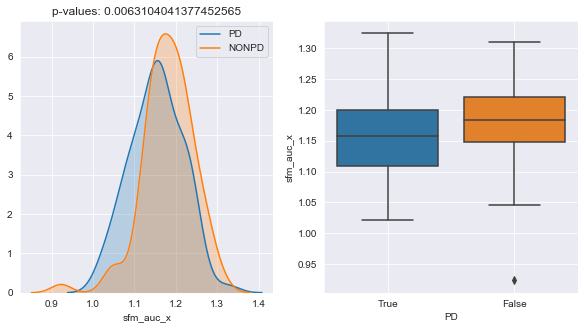

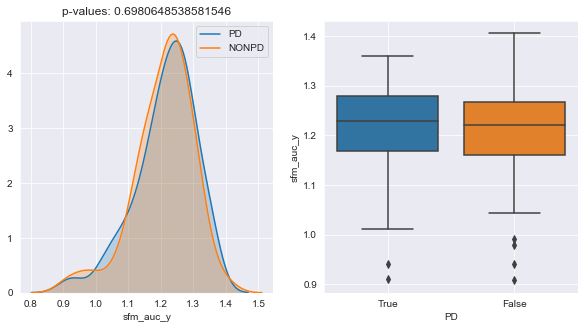

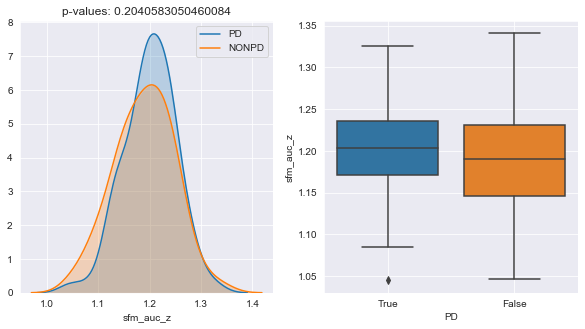

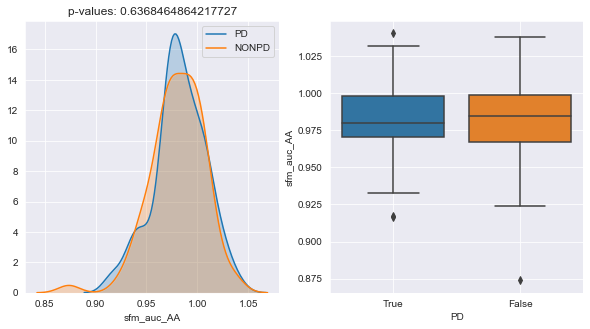

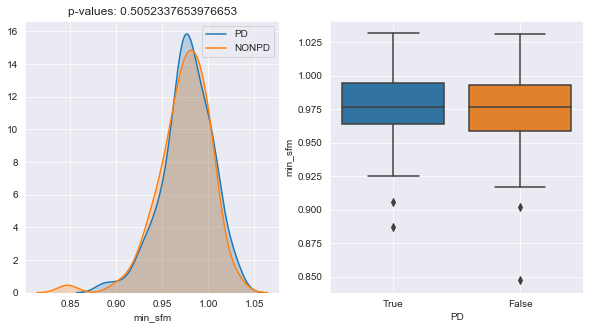

In [9]:
plot_distribution(male_balance_median_data)

#### b. Mean

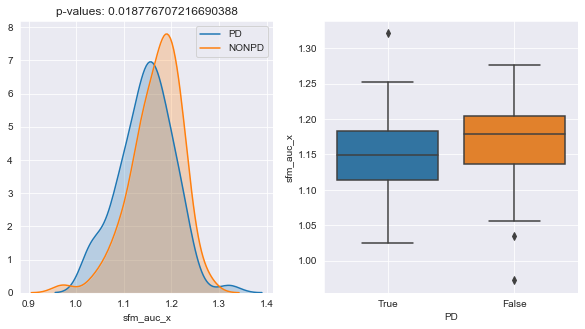

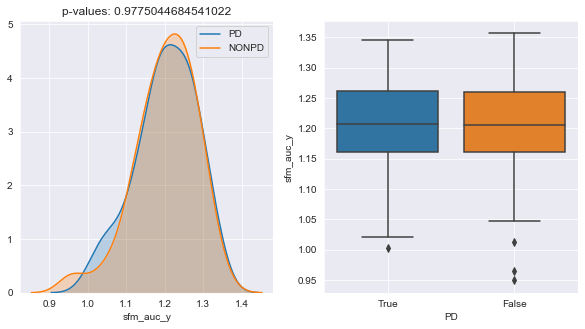

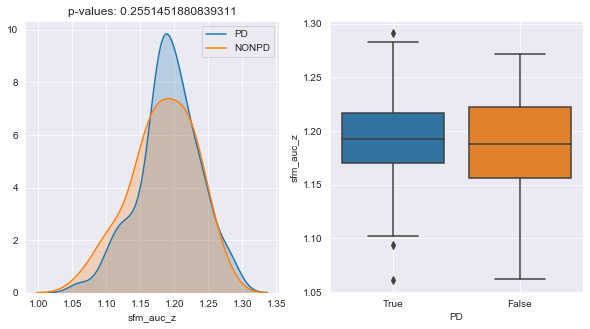

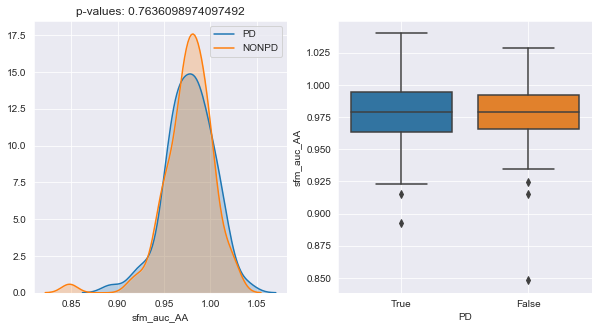

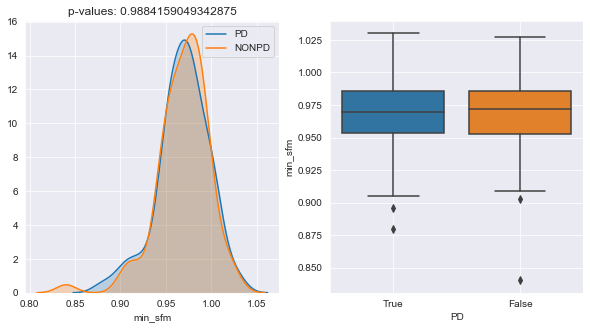

In [11]:
plot_distribution(male_balance_mean_data)

### c. Minimum

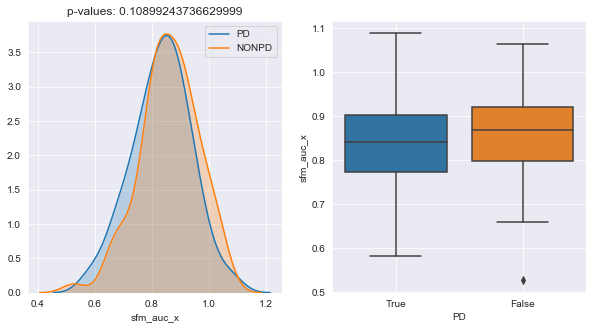

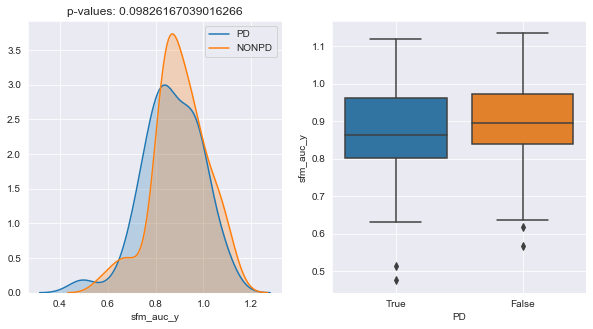

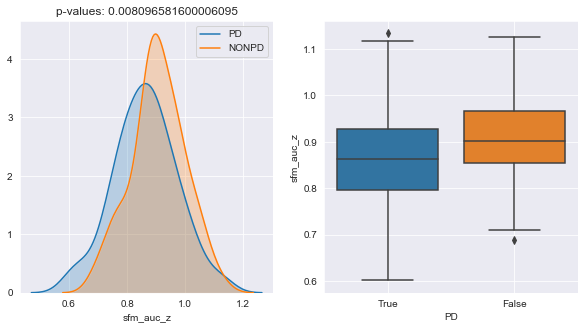

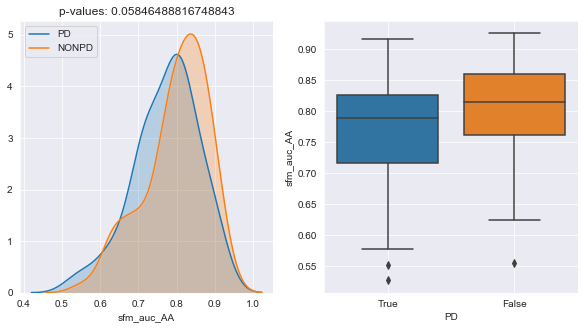

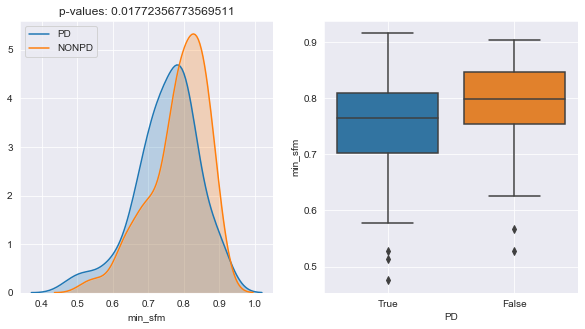

In [12]:
plot_distribution(male_balance_min_data)

# 2. Female Balance Data

In [16]:
female_balance_median_data, female_balance_mean_data, female_balance_max_data, female_balance_min_data = aggregate_func(data, "Female")

#### a. Median

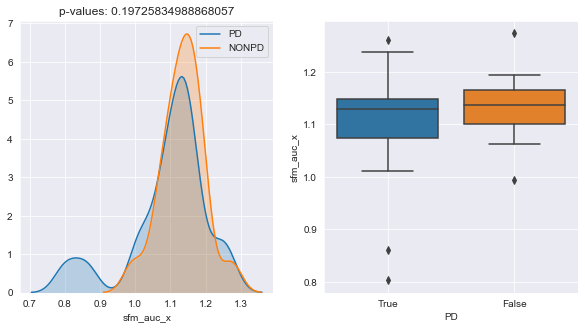

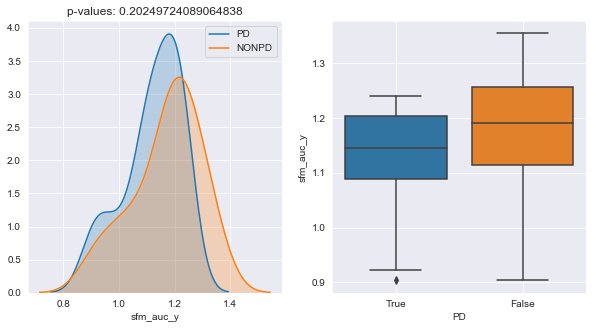

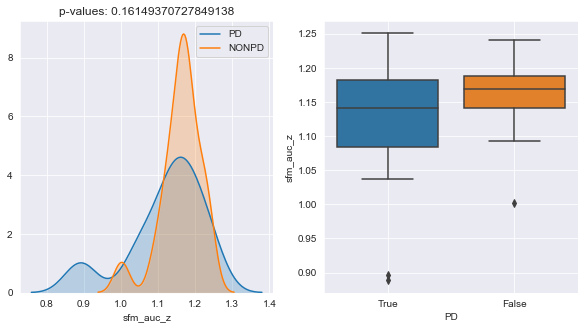

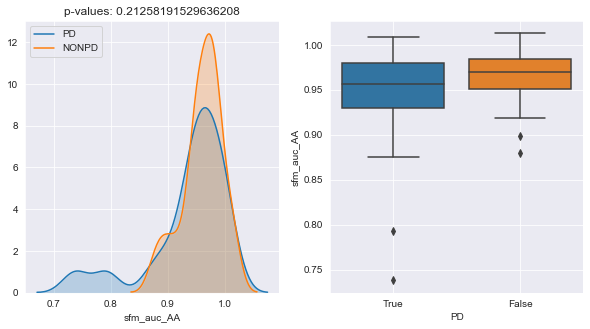

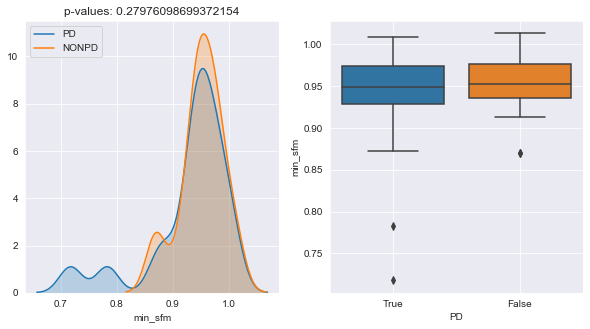

In [17]:
plot_distribution(female_balance_median_data)

#### b. Mean

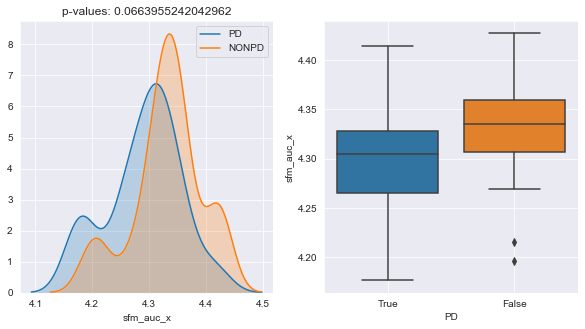

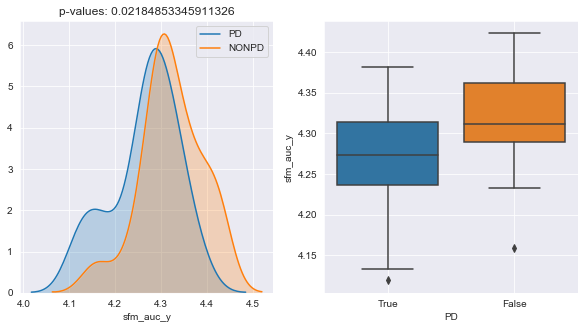

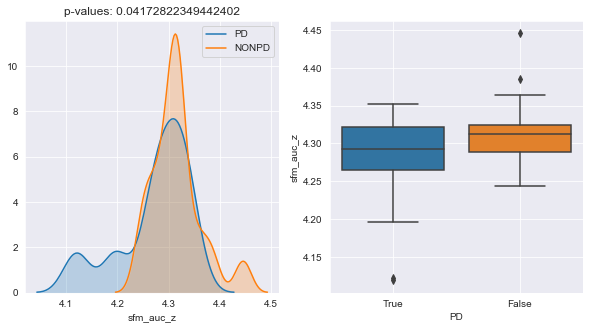

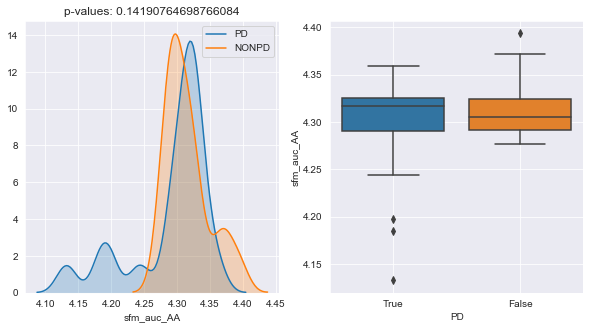

In [54]:
plot_distribution(female_balance_mean_data)

#### c. Minimum

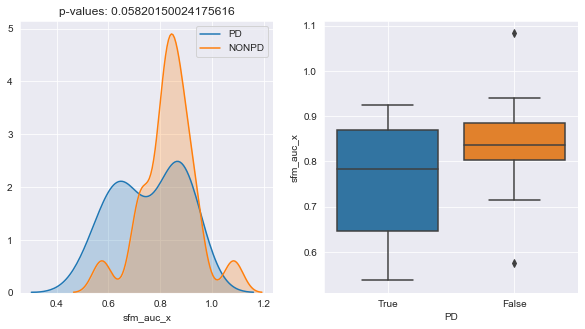

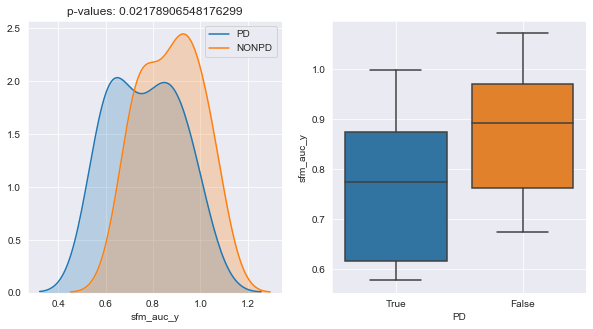

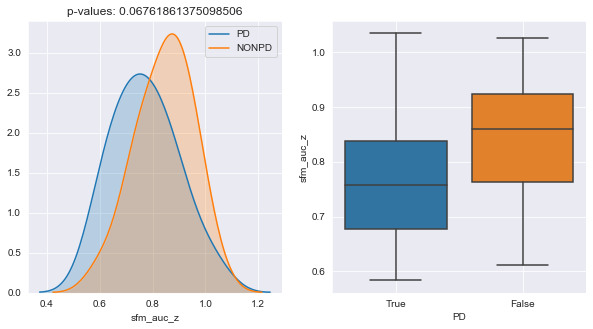

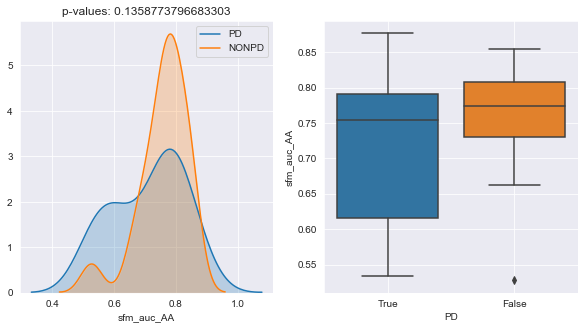

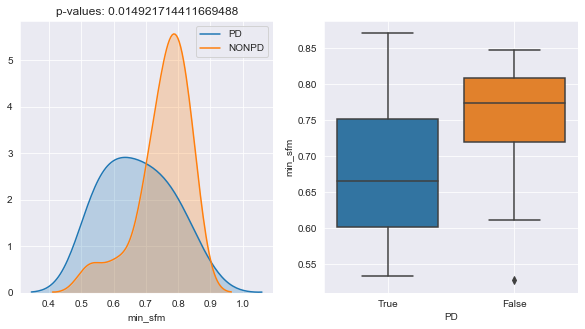

In [18]:
plot_distribution(female_balance_min_data)

# 3. Without Gender Case

#### a. Median

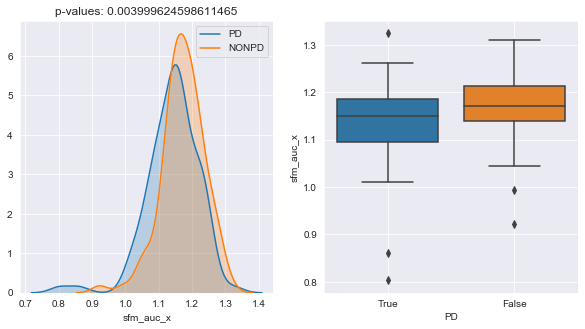

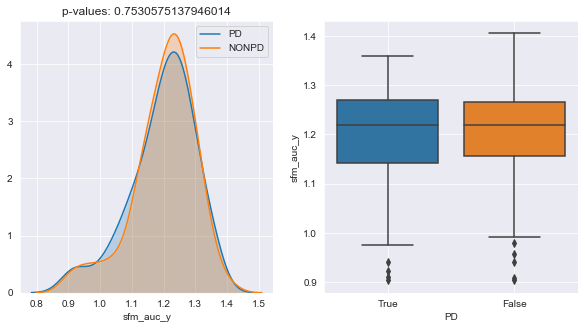

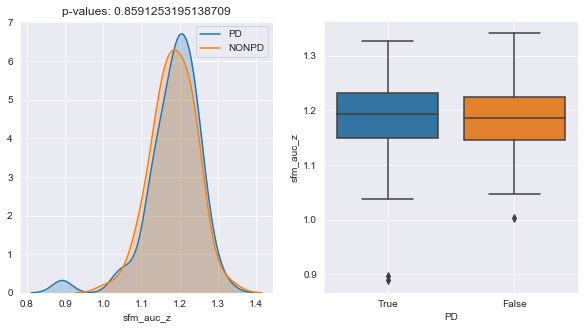

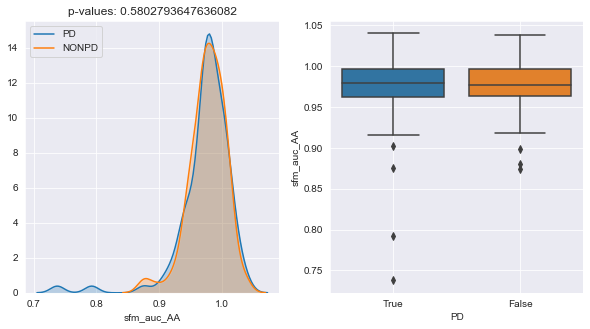

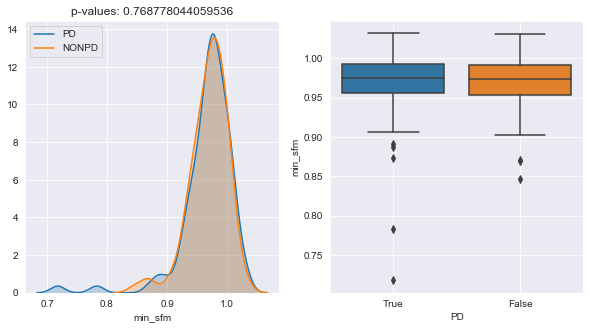

In [19]:
plot_distribution(data.groupby("healthCode").median())

#### b. Mean

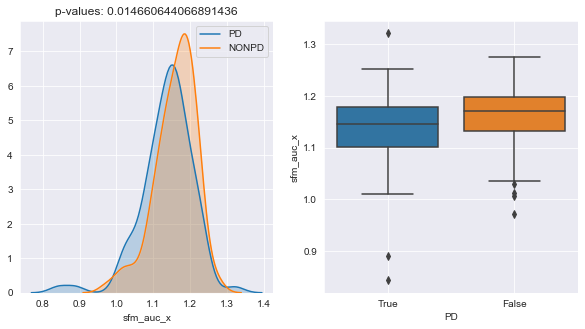

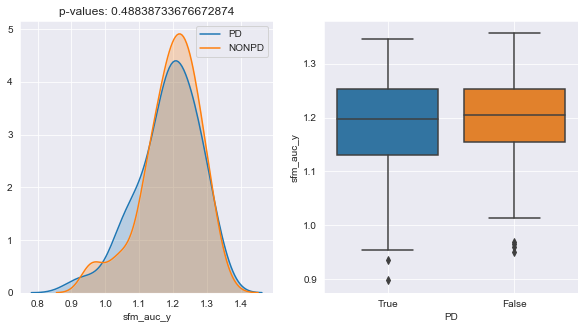

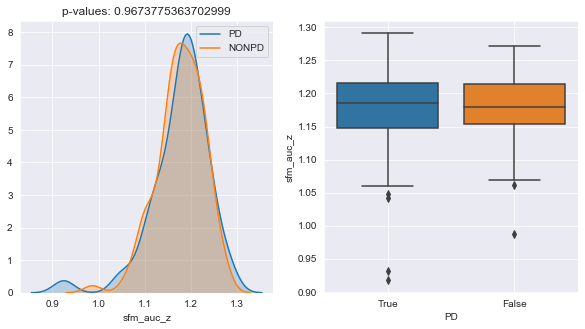

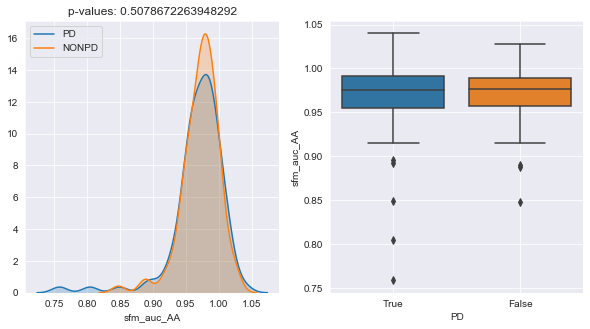

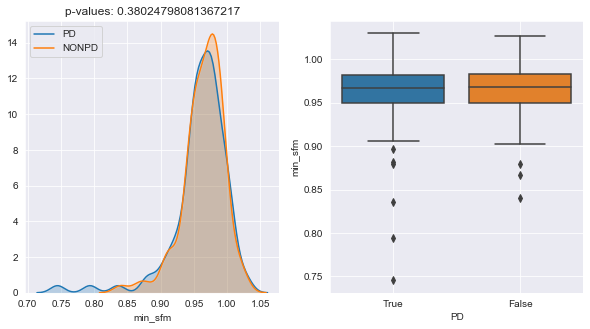

In [14]:
plot_distribution(data.groupby("healthCode").mean())

#### c. Minimum

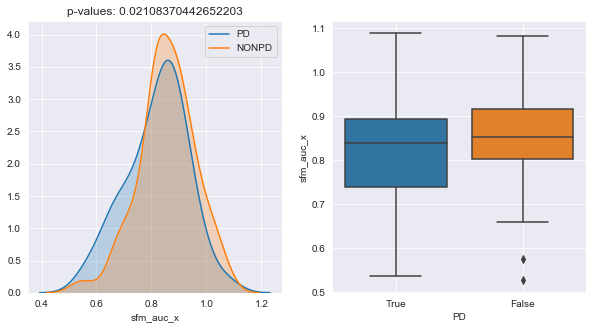

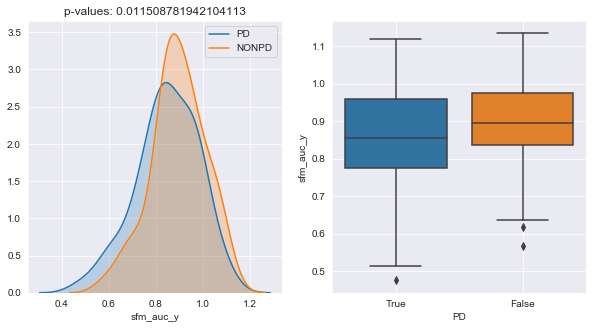

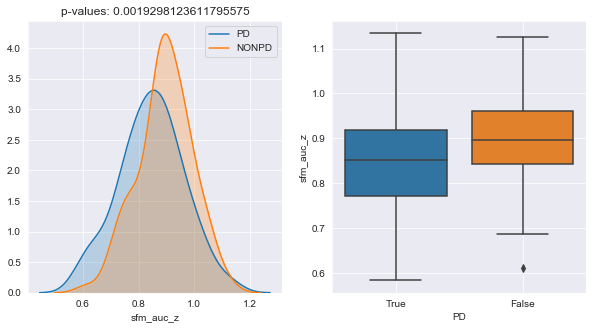

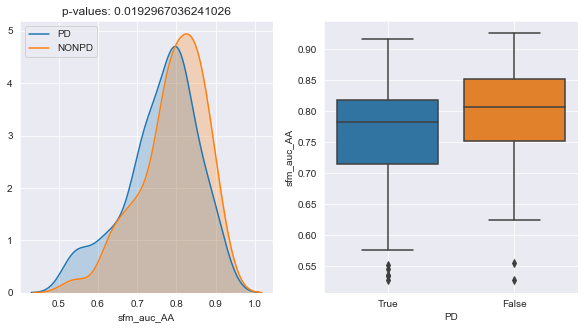

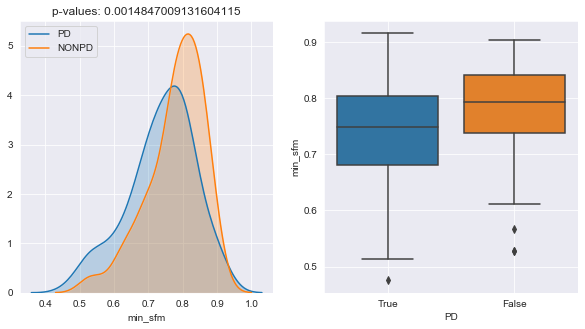

In [20]:
plot_distribution(data.groupby("healthCode").min())